# Model Evaluation

### Introduction
In this notebook, we will go through the process of creating a statistical model and evaluating its goodness of fit. We will do this for both a regression and classification model (linear and logistic regression).

### Model Identification
- EDA and data cleaning is "done" at this point.
- What is our dependent variable?
- What are our (potential) independent variables?
- Does this fit into a regression or classification framework?
- What statistical models can we use (linear regression or logistic regression for now)
    - Check model assumptions

### Regression Example

In this example, we will use a used car dataset. The dependent variable is 'selling_price' with all other variables being potential independent variables.

#### Load the dataset

The dataset is stored locally as a csv. Take some time to familiarize yourself with the dataset. Assume the data cleaning has already been performed.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

car_df = pd.read_csv("UsedCars2.csv")
car_df.head()

,selling_price,year,km_driven,owners,kmpl,engine_cc,power_bhp,seats
0,130000,2007,120000,1,16.10,1298,88.2,5
1,778000,2016,70000,2,24.52,1248,88.5,7
2,500000,2012,53000,2,23.00,1396,90.0,5
3,600000,2012,72000,1,21.50,1248,88.8,5
4,1149000,2019,5000,1,17.00,1591,121.3,5


In [23]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  1595 non-null   int64  
 1   year           1595 non-null   int64  
 2   km_driven      1595 non-null   int64  
 3   owners         1595 non-null   int64  
 4   kmpl           1595 non-null   float64
 5   engine_cc      1595 non-null   int64  
 6   power_bhp      1595 non-null   float64
 7   seats          1595 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 99.8 KB


In [24]:
car_df.describe()

,selling_price,year,km_driven,owners,kmpl,engine_cc,power_bhp,seats
count,1.595000e+03,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,6.963078e+05,2014.269592,67922.847649,1.431348,19.409555,1465.480878,93.251586,5.423824
std,8.844260e+05,3.698153,50196.275311,0.705434,3.904365,499.842407,35.342834,0.956879
min,4.000000e+04,1997.000000,1000.000000,0.000000,10.000000,624.000000,34.200000,4.000000
25%,2.800000e+05,2012.000000,32000.000000,1.000000,16.780000,1197.000000,70.000000,5.000000
50%,4.849990e+05,2015.000000,60000.000000,1.000000,19.300000,1248.000000,84.000000,5.000000
75%,7.000000e+05,2017.000000,90000.000000,2.000000,22.320000,1588.500000,103.600000,5.000000
max,6.223000e+06,2020.000000,500000.000000,4.000000,28.400000,3198.000000,261.400000,10.000000


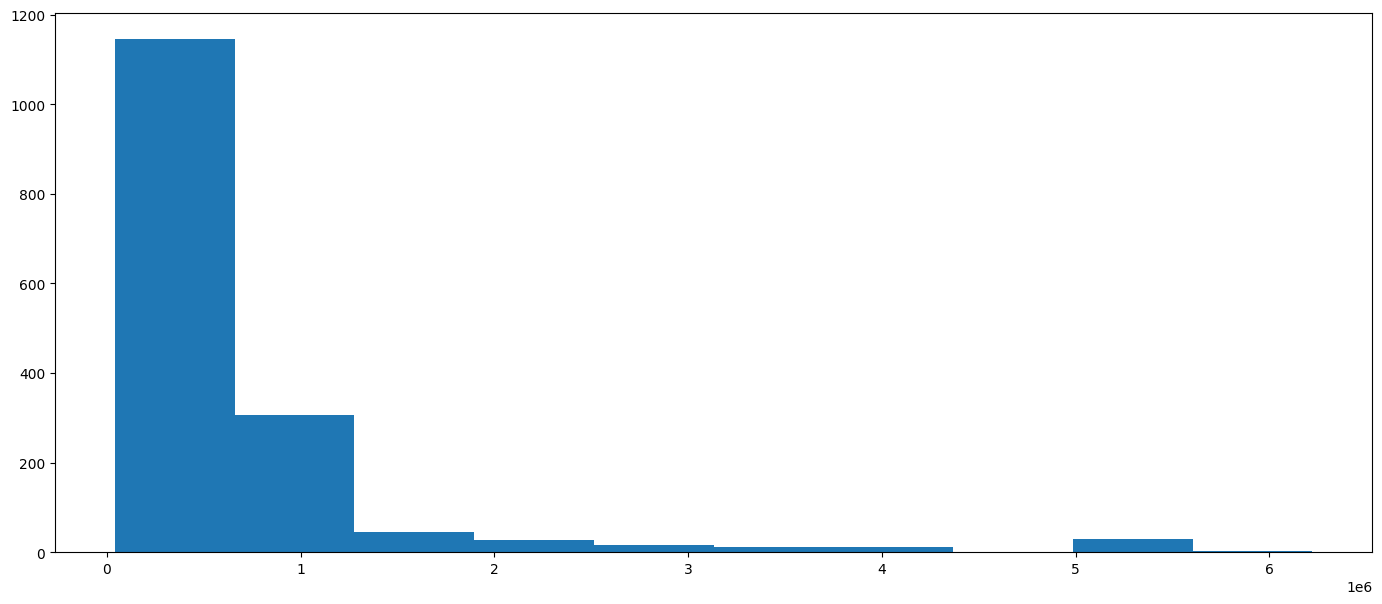

In [25]:
plt.figure(figsize=(17,7))
plt.hist(car_df['selling_price'])
plt.show()

In [26]:
error_sp = car_df['selling_price'] - car_df['selling_price'].mean()

absolute_percent_error_sp = np.abs(error_sp.values)/car_df['selling_price'].values

print(f"average percent error when predicting engine Selling Price using the mean only: {np.round(100*np.mean(absolute_percent_error_sp))}%")

average percent error when predicting engine Selling Price using the mean only: 126.0%


For nominal categorical variables with three or more categories, it is recommended to "one-hot-encode" (especially for linear and logistic regression). This accounts for the nominal aspect of the categories and allows linear regression to assign a coefficient for category. One-hot-encoding can be done quite easily using pandas's `get_dummies()` function.

In [27]:
df_categories = pd.DataFrame({'color' : ['blue', 'red', 'green', 'blue']})
df_categories

,color
0,blue
1,red
2,green
3,blue


In [28]:
pd.get_dummies(df_categories)

,color_blue,color_green,color_red
0,True,False,False
1,False,False,True
2,False,True,False
3,True,False,False


### Building Models

We are now ready to start building a linear regression model! But which independent variables should we use? All of them? A select few? Which will be the best model? There are a few strategies we could implement.

#### Forward Selection
1. Build all models that contain only one independent variable.
    - $selling\_price = b_0+b_1(year)$
    - $selling\_price = b_0+b_1(km\_driven)$
    - $selling\_price = b_0+b_1(fuel)$
    - etc...
2. Identify the best model (maybe highest adj. R<sup>2</sup> value) and then add one more variable at a time.
3. Find the new best model.
4. Repeat until you hit some stopping criteria (maybe adj. R<sup>2</sup> stops increasing or you get p-values > 0.05).

![](images/forward_selection.png)



In [29]:
import statsmodels.api as sm

y = car_df['selling_price']
car_df_new = car_df.drop(columns=['selling_price'])

car_df_new.columns

Index(['year', 'km_driven', 'owners', 'kmpl', 'engine_cc', 'power_bhp',
       'seats'],
      dtype='object')

In [30]:
# start with an empty list
X=[]

# for loop to go through a list of things (in this case, each column in car_df_new)
for column in car_df_new.columns:

    # appending something to our list (X), and the 'something' is sm.add_constant(car_df_new[column])
    X.append(sm.add_constant(car_df_new[column]))

In [10]:
# X = [sm.add_constant(car_df_new['selling_price']), sm.add_constant(car_df_new['year']), sm.add_constant(car_df_new['km_driven']), ...]

#Create a model for each indep. variable
#list of X's (with constants)
X = [sm.add_constant(car_df_new[column]) for column in car_df_new.columns]

In [32]:
X[0].head()

,const,year
0,1.0,2007
1,1.0,2016
2,1.0,2012
3,1.0,2012
4,1.0,2019


In [33]:
model_selling_price = sm.OLS(y,X[0])
results_selling_price = model_selling_price.fit()
ajd_r2_selling_price = results_selling_price.rsquared_adj
pvalues_selling_price = results_selling_price.pvalues

print(ajd_r2_selling_price)
print(pvalues_selling_price)

0.17367044629471817
const    7.813010e-68
year     2.981846e-68
dtype: float64


In [34]:
print(results_selling_price.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     336.0
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.98e-68
Time:                        10:33:40   Log-Likelihood:                -23950.
No. Observations:                1595   AIC:                         4.790e+04
Df Residuals:                    1593   BIC:                         4.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.004e+08    1.1e+07    -18.267      0.0

In [36]:
Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of p-values

for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {car_df_new.columns[i]}')

adj_R2: 0.174, P-values: (7.813010353972355e-68, 2.9818464289456887e-68), column: year
adj_R2: 0.070, P-values: (1.913408757155729e-142, 3.5013116609693015e-27), column: km_driven
adj_R2: 0.057, P-values: (1.5186541212461957e-102, 2.433141313618573e-22), column: owners
adj_R2: 0.013, P-values: (8.93545036142581e-27, 2.08815881975255e-06), column: kmpl
adj_R2: 0.199, P-values: (9.80558467000735e-14, 5.868115795937413e-79), column: engine_cc
adj_R2: 0.579, P-values: (9.412782556135599e-130, 3.711012723024057e-302), column: power_bhp
adj_R2: -0.000, P-values: (2.922458353966046e-06, 0.4359248539986663), column: seats


In [17]:
Results[0].pvalues

const    7.813010e-68
year     2.981846e-68
dtype: float64

From this output, we can see that the model with 'power_bhp' had the highest adj. R-squared value. Now let's try all models that consist of 'power_bhp' and another variable.

In [39]:
remaining_var = car_df.drop(['selling_price', 'power_bhp'], axis=1)
included_df = car_df[['power_bhp']]

In [41]:
X = [sm.add_constant(pd.merge(included_df, remaining_var[column], right_index = True, left_index = True))\
     for column in remaining_var.columns]
X[0]

,const,power_bhp,year
0,1.0,88.20,2007
1,1.0,88.50,2016
2,1.0,90.00,2012
3,1.0,88.80,2012
4,1.0,121.30,2019
...,...,...,...
1590,1.0,67.04,2017
1591,1.0,67.06,2014
1592,1.0,102.00,2010
1593,1.0,37.00,1997


In [42]:
Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of list of p-values

for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {remaining_var.columns[i]}')

adj_R2: 0.639, P-values: (1.0016051895193306e-55, 1.2162697843804209e-288, 7.611907554017845e-55), column: year
adj_R2: 0.630, P-values: (2.9782373750039724e-67, 2.737e-321, 1.3575094353398062e-46), column: km_driven
adj_R2: 0.605, P-values: (2.0502564956260526e-46, 5.1186413749481356e-303, 2.191183833001878e-23), column: owners
adj_R2: 0.618, P-values: (2.9293658745876216e-99, 0.0, 3.6205566491892854e-35), column: kmpl
adj_R2: 0.596, P-values: (1.728416299586615e-80, 2.17291507649404e-239, 5.051132565767059e-16), column: engine_cc
adj_R2: 0.595, P-values: (3.0827264856704424e-09, 1.012762537e-314, 1.361269323973158e-14), column: seats


It looks like 'power_bhp' with 'year' is now the "best" model. Keep repeating this process until the adjusted R<sup>2</sup> stops increasing by a significant amount, or we get insignificant indep. variables in our model.

In [43]:
remaining_var = car_df.drop(['selling_price', 'power_bhp', 'year'], axis=1)
included_df = car_df[['power_bhp', 'year']]

In [45]:
X = [sm.add_constant(pd.merge(included_df,remaining_var[column], right_index = True, left_index = True))\
     for column in remaining_var.columns]
X[0]

,const,power_bhp,year,km_driven
0,1.0,88.20,2007,120000
1,1.0,88.50,2016,70000
2,1.0,90.00,2012,53000
3,1.0,88.80,2012,72000
4,1.0,121.30,2019,5000
...,...,...,...,...
1590,1.0,67.04,2017,12000
1591,1.0,67.06,2014,50000
1592,1.0,102.00,2010,129000
1593,1.0,37.00,1997,120000


In [46]:
Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of list of p-values

for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {remaining_var.columns[i]}')

adj_R2: 0.653, P-values: (1.3816439156385271e-24, 1.178644497776337e-300, 3.424871367223632e-24, 6.940265994746827e-16), column: km_driven
adj_R2: 0.640, P-values: (3.1533552790888426e-35, 9.663792642458213e-290, 8.600152533651299e-35, 0.006191716039317062), column: owners
adj_R2: 0.647, P-values: (3.2587569499225727e-31, 1.0195263014624281e-265, 5.95021598502424e-30, 3.9091747859176427e-10), column: kmpl
adj_R2: 0.644, P-values: (2.3233700604729166e-46, 2.507174409756991e-198, 1.0856379138605711e-45, 1.0046581761524496e-06), column: engine_cc
adj_R2: 0.650, P-values: (5.766392969574568e-53, 1.2532079582557817e-298, 1.4546564360140079e-52, 2.635421899880754e-12), column: seats


In [48]:
remaining_var = car_df.drop(['selling_price', 'power_bhp', 'year', 'km_driven'], axis=1)
included_df = car_df[['power_bhp', 'year', 'km_driven']]

X = [sm.add_constant(pd.merge(included_df,remaining_var[column], right_index = True, left_index = True))\
     for column in remaining_var.columns]

Models = [sm.OLS(y,x) for x in X] #list of models
Results = [model.fit() for model in Models] #list of results
Adj_Rsquared = [results.rsquared_adj for results in Results] #list of rsquared
Pval = [results.pvalues for results in Results] #list of list of p-values

for i in range(len(Adj_Rsquared)):
     print(f'adj_R2: {Adj_Rsquared[i]:.3f}, P-values: {*Pval[i],}, column: {remaining_var.columns[i]}')

adj_R2: 0.654, P-values: (1.4025386685127594e-17, 4.446218328548049e-301, 2.4623940605327195e-17, 4.8209299914354366e-15, 0.054019726034480256), column: owners
adj_R2: 0.661, P-values: (4.520416085986753e-13, 1.1364963748394605e-275, 1.6934225012921259e-12, 2.223464071174374e-15, 1.2561337248199944e-09), column: kmpl
adj_R2: 0.654, P-values: (4.697111808363257e-24, 2.525630867086824e-184, 1.1055318498053675e-23, 8.273175074370822e-12, 0.019072029389475314), column: engine_cc
adj_R2: 0.658, P-values: (2.9756095590785835e-26, 1.4477809213133792e-304, 5.446723779115383e-26, 1.4285901026167884e-10, 5.95437158704148e-07), column: seats


Hopefully you get the point. We eventually settle on a "best model". This whole process can be quite time consuming! Usually a different selection method is preferred:

#### Backward Selection
1. Build a model that contains all variables
    - selling\_price = b_0+b_1(year) + b_2(km\_driven) + b_3(fuel) + ...
2. Remove one variable at a time usually based on p-value.
3. Repeat until you hit some stopping criteria (maybe adj. R<sup>2</sup> stops increasing).

![](images/backward_selection.png)



In [49]:
#run full model
y = car_df['selling_price']
X = car_df.drop('selling_price', axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     449.6
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:01:00   Log-Likelihood:                -23231.
No. Observations:                1595   AIC:                         4.648e+04
Df Residuals:                    1587   BIC:                         4.652e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.48e+07   1.02e+07     -6.354      0.0

Notice the Adj. R-Squared and p-value for each of the coefficients. The coefficient for 'owners' seems to be the only variable that has a p-value > 0.05. Let's try removing it and running another model.

In [50]:
#run full model
y = car_df['selling_price']
X = car_df.drop(['selling_price', 'owners'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     523.0
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:03:47   Log-Likelihood:                -23233.
No. Observations:                1595   AIC:                         4.648e+04
Df Residuals:                    1588   BIC:                         4.652e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.258e+07   9.38e+06     -7.735      0.0

In [51]:
#run full model
y = car_df['selling_price']
X = car_df.drop(['selling_price', 'owners', 'engine_cc'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     625.0
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:04:48   Log-Likelihood:                -23235.
No. Observations:                1595   AIC:                         4.648e+04
Df Residuals:                    1589   BIC:                         4.651e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.221e+07   9.39e+06     -7.688      0.0

In [52]:
#run full model
y = car_df['selling_price']
X = car_df.drop(['selling_price', 'owners', 'engine_cc', 'seats'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     777.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:05:12   Log-Likelihood:                -23238.
No. Observations:                1595   AIC:                         4.649e+04
Df Residuals:                    1590   BIC:                         4.651e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.609e+07   9.05e+06     -7.300      0.0

At this point, we'd probably just stick with this model. All coefficients have significant p-values.

#### Stepwise Selection
- A combination of forward and backward selection.

#### Forward vs Backward Selection
- Forward selection is better when there are more variables than datapoints. Otherwise backward selection is typically used.
- Backward can consider the effects of all variables simultaneously.
- Different selection methods can give different results: an inexact science.
    - Notice in the backward selection model, engine_cc would have been the next to be eliminated if sig. level=0.01 instead of 0.05
- Over this process you'll find out which variables tend to get eliminated and which tend to be kept (hopefully).

## Classification Example

The exact same process can be used when building a logistic regression model. Perhaps we only have information on if the selling price of a car is greater than 500000 or not.

In [53]:
car_df.head()

,selling_price,year,km_driven,owners,kmpl,engine_cc,power_bhp,seats
0,130000,2007,120000,1,16.10,1298,88.2,5
1,778000,2016,70000,2,24.52,1248,88.5,7
2,500000,2012,53000,2,23.00,1396,90.0,5
3,600000,2012,72000,1,21.50,1248,88.8,5
4,1149000,2019,5000,1,17.00,1591,121.3,5


In [54]:
import numpy as np
car_df['expensive'] = np.where(car_df['selling_price']>500000, 1, 0)
car_exp_df = car_df.drop(['selling_price'], axis=1)
car_exp_df

,year,km_driven,owners,kmpl,engine_cc,power_bhp,seats,expensive
0,2007,120000,1,16.10,1298,88.20,5,0
1,2016,70000,2,24.52,1248,88.50,7,1
2,2012,53000,2,23.00,1396,90.00,5,0
3,2012,72000,1,21.50,1248,88.80,5,1
4,2019,5000,1,17.00,1591,121.30,5,1
...,...,...,...,...,...,...,...,...
1590,2017,12000,1,23.10,998,67.04,5,0
1591,2014,50000,1,23.59,1364,67.06,5,0
1592,2010,129000,1,12.80,2494,102.00,8,0
1593,1997,120000,1,16.10,796,37.00,4,0


So 'expensive' is our binary dependent variable and we will consider the rest as potential independent variables. Let's use backwards selection for convenience :)

In [55]:
y = car_exp_df['expensive']
X  = car_exp_df.drop(['expensive'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y,X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.304869
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              expensive   No. Observations:                 1595
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.5592
Time:                        11:13:38   Log-Likelihood:                -486.27
converged:                       True   LL-Null:                       -1103.1
Covariance Type:            nonrobust   LLR p-value:                3.753e-262
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1405.5027    100.711    -13.956      0.000   -1602.893   -1208.113
year           0.6897      0

In [56]:
results.aic

988.5324370249298

The p-value for the km_drive coefficient is >0.05. Let's try removing that from the model.

In [57]:
y = car_exp_df['expensive']
X  = car_exp_df.drop(['expensive', 'km_driven'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y,X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.304897
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              expensive   No. Observations:                 1595
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.5591
Time:                        11:17:00   Log-Likelihood:                -486.31
converged:                       True   LL-Null:                       -1103.1
Covariance Type:            nonrobust   LLR p-value:                2.625e-263
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1394.8604     94.087    -14.825      0.000   -1579.267   -1210.454
year           0.6844      0.

In [58]:
results.aic

986.622706428263

In [59]:
y = car_exp_df['expensive']
X  = car_exp_df.drop(['expensive', 'km_driven', 'owners'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y,X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.307579
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              expensive   No. Observations:                 1595
Model:                          Logit   Df Residuals:                     1589
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.5553
Time:                        11:17:20   Log-Likelihood:                -490.59
converged:                       True   LL-Null:                       -1103.1
Covariance Type:            nonrobust   LLR p-value:                1.133e-262
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1489.2419     90.123    -16.525      0.000   -1665.880   -1312.604
year           0.7311      0.

In [60]:
results.aic

993.1779163651563

Looks like this can be our final model!

### Bonus:
See what happens to the adjusted R-squared when you remove a variable that seems quite important to the model. The R-squared value will **always** decrease when you remove a variable, but the adjusted R-squared is able to increase.